In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

ERROR: nltk 3.7 has requirement regex>=2021.8.3, but you'll have regex 2020.11.13 which is incompatible.
ERROR: flask 1.1.4 has requirement click<8.0,>=5.1, but you'll have click 8.1.3 which is incompatible.
ERROR: huggingface-hub 0.7.0 has requirement packaging>=20.9, but you'll have packaging 20.1 which is incompatible.
ERROR: responses 0.18.0 has requirement urllib3>=1.25.10, but you'll have urllib3 1.25.8 which is incompatible.
ERROR: multiprocess 0.70.13 has requirement dill>=0.3.5.1, but you'll have dill 0.3.4 which is incompatible.


In [2]:
from fastbook import *

In [4]:
from fastai.vision.all import *
path = Path(r'D:\Projects\DL\Kidney_stone_detection-main\Dataset')

In [5]:
train_fnames = get_image_files(path/"Train")

In [6]:
augs = [RandomResizedCropGPU(size=224, min_scale=0.75), Rotate(), Zoom()]
dblock = DataBlock(blocks=(ImageBlock(cls=PILImage), CategoryBlock),
                   splitter=RandomSplitter(valid_pct=0.2, seed=23),
                   get_y=parent_label,
                   item_tfms=Resize(512, method="squish"),
                   batch_tfms=augs,
                   )

dls = dblock.dataloaders(train_fnames)


Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [7]:
# print number of classes and length of train and valid datasets
dls.c, len(dls.train_ds), len(dls.valid_ds)

(2, 1163, 290)

In [8]:
dls.vocab

['Kidney_stone', 'Normal']

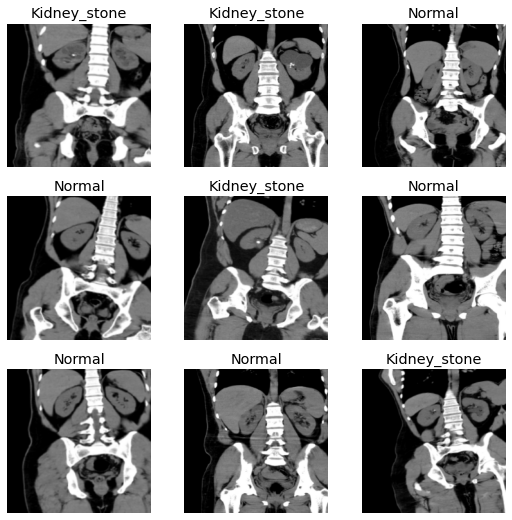

In [9]:
dls.show_batch()

In [10]:
model = nn.Sequential(create_body(xresnet50, pretrained=False),create_head(nf=2048, n_out=2))
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)



In [ ]:
learn.a(40,1e-2)

epoch,train_loss,valid_loss,accuracy,time


In [ ]:
learn.save(path/'kidney-50')

Path('/content/gdrive/My Drive/Deep/Stone/kidney-50.pth')

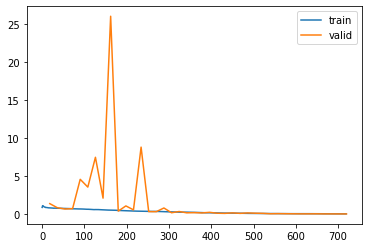

In [ ]:
learn.recorder.plot_loss(skip_start=0, with_valid=True)

In [ ]:
#test_items = get_image_files(path/"Test")
all_files= get_image_files(path)

# Evaluating model performance using the unseen test set

In [ ]:

augs = [RandomResizedCropGPU(size=224, min_scale=0.75), Rotate(), Zoom()]
dblock = DataBlock(blocks=(ImageBlock(cls=PILImage), CategoryBlock),
                   splitter=GrandparentSplitter(train_name='Train', valid_name='Test'),
                   get_y=parent_label,
                   item_tfms=Resize(512, method="squish"),
                   batch_tfms=augs,
                   )

dls_test = dblock.dataloaders(all_files)



In [ ]:
print("Number of examples in testing:", len(dls_test.valid_ds))

Number of examples in testing: 346


In [ ]:
model = nn.Sequential(create_body(xresnet50, pretrained=False),create_head(nf=2048, n_out=2))

In [ ]:
learn1 = learn1 = Learner(dls_test, model, loss_func=CrossEntropyLossFlat(), metrics=accuracy).load('/content/gdrive/My Drive/Deep/Stone/kidney-50')

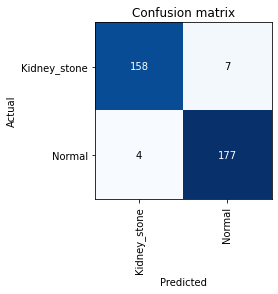

In [ ]:
interp = ClassificationInterpretation.from_learner(learn1)
interp.plot_confusion_matrix()


In [ ]:
interp.print_classification_report()

              precision    recall  f1-score   support

Kidney_stone       0.98      0.96      0.97       165
      Normal       0.96      0.98      0.97       181

    accuracy                           0.97       346
   macro avg       0.97      0.97      0.97       346
weighted avg       0.97      0.97      0.97       346

